In [22]:
import pandas as pd

titanic_df = pd.read_csv("final_data_titanic.csv")

## Handling data normalization
Data normalization is the process of transforming data into a common scale or range, to eliminate differences in magnitude and make the data more comparable and interpretable. Normalization is an important step in data preprocessing, as it can improve the accuracy and performance of machine learning models and other data analysis techniques.

### 1. Min-Max Normalization
This method scales the data to a fixed range, typically between 0 and 1. The formula for min-max normalization is:

  x_norm = (x - x_min) / (x_max - x_min)

In [23]:
min_fare = titanic_df.Fare.min()
max_fare = titanic_df.Fare.max()

In [24]:
norm_fare = ( titanic_df.Fare - min_fare ) / (max_fare - min_fare )
norm_fare.describe()

count    867.000000
mean       0.169776
std        0.186048
min        0.000000
25%        0.051451
50%        0.087969
75%        0.193533
max        1.000000
Name: Fare, dtype: float64

In [25]:
titanic_df.Fare.describe()

count    867.000000
mean      26.054262
std       28.551428
min        0.000000
25%        7.895800
50%       13.500000
75%       29.700000
max      153.462500
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

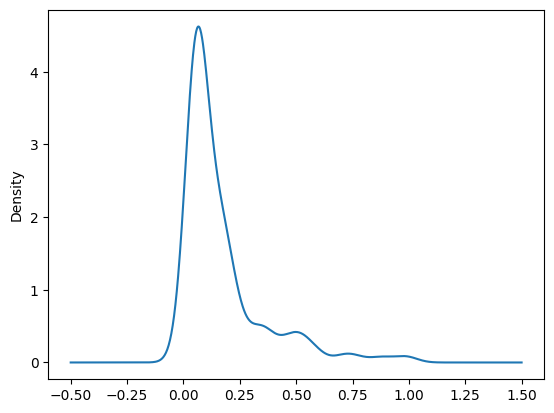

In [26]:
norm_fare.plot(kind = "kde")

<Axes: ylabel='Density'>

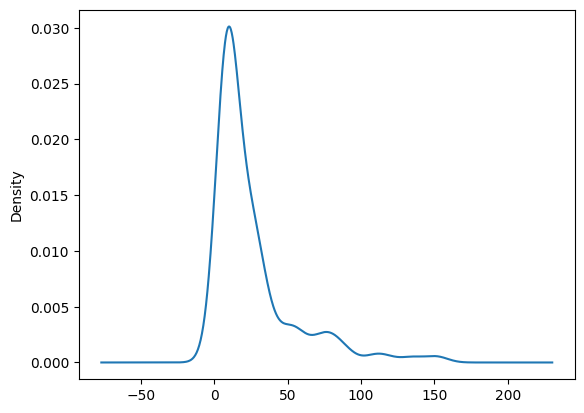

In [27]:
titanic_df.Fare.plot(kind = "kde")

## What Min-Max Scaling Preserves:
### 1.Relative Order of Values (Monotonicity):

* If one value is greater than another before scaling, it remains greater after scaling.
* Example: If ( x_1 < x_2 ) in the original data, then ( x'_1 < x'_2 ) after scaling.
### 2. Proportional Spacing (Linear Transformation):

* The distance between values is proportionally reduced or expanded within the new scale.
### 3. Feature Relationships:

* If two features have a strong correlation before scaling, the correlation remains the same after scaling.


## What Min-Max Scaling Does NOT Preserve:
### 1.Outlier Effects:

* Since Min-Max scaling compresses all values into a fixed range (e.g., [0,1] or [-1,1]), outliers can dominate the scaling and distort patterns.
* Example: If one value is an extreme outlier, all other values will be squashed closer together.
### 2.Absolute Differences:

* Since all values are mapped to a fixed range, differences between large and small values may lose interpretability.
### 3.Gaussian Distributions:

* If the original data is normally distributed, Min-Max scaling does not maintain the bell-shaped distribution.


### Conclusion:
For data with a uniform range and without extreme outliers, Min-Max scaling preserves patterns well.
For data with outliers or a skewed distribution, Min-Max scaling may distort the structure, and alternatives like Z-score normalization (StandardScaler) may be better.

In [28]:
from sklearn.preprocessing import MinMaxScaler

num_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns

mm_scaler = MinMaxScaler()
titanic_df[num_cols] = mm_scaler.fit_transform(titanic_df[num_cols])

titanic_df.head()


,Survived,new_initials,Pclass,Age,SibSp,Parch,Fare,Cabin,initials,female,male,Embarked_enc
0,0.0,Mr,1.0,0.271174,0.125,0.0,0.047243,0.0,Mr,0.0,1.0,1.0
1,1.0,Mrs,0.0,0.472229,0.125,0.0,0.464500,1.0,Mrs,1.0,0.0,0.0
2,1.0,Miss,1.0,0.321438,0.000,0.0,0.051641,0.0,Miss,1.0,0.0,1.0
3,1.0,Mrs,0.0,0.434531,0.125,0.0,0.346013,1.0,Mrs,1.0,0.0,1.0
4,0.0,Mr,1.0,0.434531,0.000,0.0,0.052456,0.0,Mr,0.0,1.0,1.0


### 2. Z-score Normalization / StandardScaler

This method scales the data to have zero mean and unit variance. 
The formula for z-score normalization is:

                   x_norm = (x - mean) / std

where x is the original value, mean and std are the mean and standard deviation of the data, respectively, and x_norm is the normalized value.

In [29]:
mean_fare = titanic_df.Fare.mean()
std_fare = titanic_df.Fare.std()
fare_norm = (titanic_df.Fare - mean_fare) / std_fare
fare_norm.describe()

count    8.670000e+02
mean     4.097709e-17
std      1.000000e+00
min     -9.125380e-01
25%     -6.359914e-01
50%     -4.397070e-01
75%      1.276902e-01
max      4.462412e+00
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

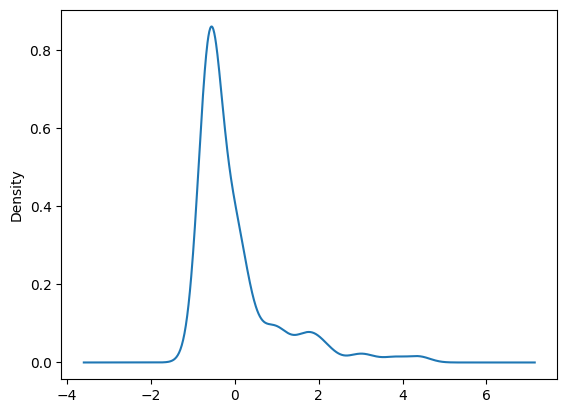

In [30]:
import numpy as np
fare_norm.plot(kind = "kde")

## Min-Max Scaler vs. StandardScaler: A Comparison

Both **MinMaxScaler** and **StandardScaler** are commonly used for feature scaling in machine learning, but they behave differently and are suited for different situations.

### Comparison Table

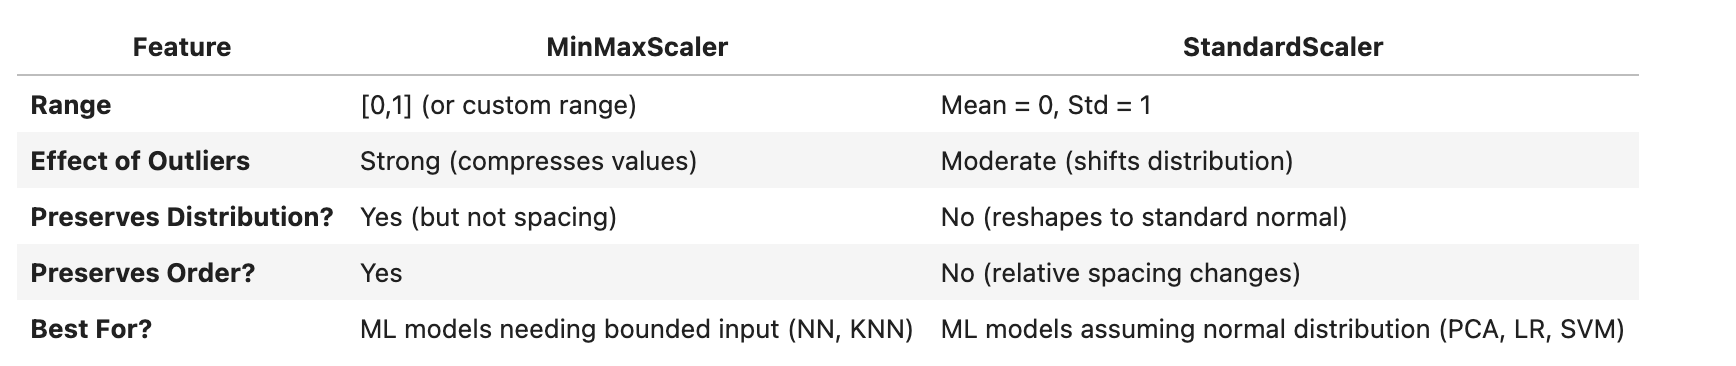

In [33]:
num_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = titanic_df.select_dtypes(include=['object']).columns


In [35]:
titanic_encoded = pd.get_dummies(titanic_df, drop_first=True)

std_scaler = StandardScaler()
titanic_final = pd.DataFrame(
    std_scaler.fit_transform(titanic_encoded),
    columns=titanic_encoded.columns
)

titanic_final.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_enc,...,initials_ Miss,initials_ Mlle,initials_ Mme,initials_ Mr,initials_ Mrs,initials_ Ms,initials_ Rev,initials_ Sir,initials_ the Countess,initials_mr
0,-0.770552,0.799199,-0.587040,0.429544,-0.461968,-0.658990,-0.519037,-0.721840,0.721840,0.575778,...,-0.493865,-0.048085,-0.033981,0.838654,-0.400802,-0.033981,-0.083478,-0.033981,-0.033981,-0.033981
1,1.297771,-1.649231,0.643870,0.429544,-0.461968,1.585040,1.926644,1.385349,-1.385349,-1.990800,...,-0.493865,-0.048085,-0.033981,-1.192387,2.494995,-0.033981,-0.083478,-0.033981,-0.033981,-0.033981
2,1.297771,0.799199,-0.279312,-0.472187,-0.461968,-0.635335,-0.519037,1.385349,-1.385349,0.575778,...,2.024846,-0.048085,-0.033981,-1.192387,-0.400802,-0.033981,-0.083478,-0.033981,-0.033981,-0.033981
3,1.297771,-1.649231,0.413075,0.429544,-0.461968,0.947811,1.926644,1.385349,-1.385349,0.575778,...,-0.493865,-0.048085,-0.033981,-1.192387,2.494995,-0.033981,-0.083478,-0.033981,-0.033981,-0.033981
4,-0.770552,0.799199,0.413075,-0.472187,-0.461968,-0.630955,-0.519037,-0.721840,0.721840,0.575778,...,-0.493865,-0.048085,-0.033981,0.838654,-0.400802,-0.033981,-0.083478,-0.033981,-0.033981,-0.033981


### 3.Log transformation:

This method applies a logarithmic function to the data, to reduce the range of values and make the data more symmetric and normally distributed. The formula for log normalization is:

            x_norm = log(x)
where x is the original value, and x_norm is the normalized value.

In [36]:
import numpy as np

peak = 5 * 10e2   # 500000
n = 250            # points per side

k = np.log(peak)
growth = np.exp(np.linspace(1, k, n))
decay = np.exp(np.linspace(k, 1, n))
data = np.concatenate([growth, decay[1:]])


<Axes: >

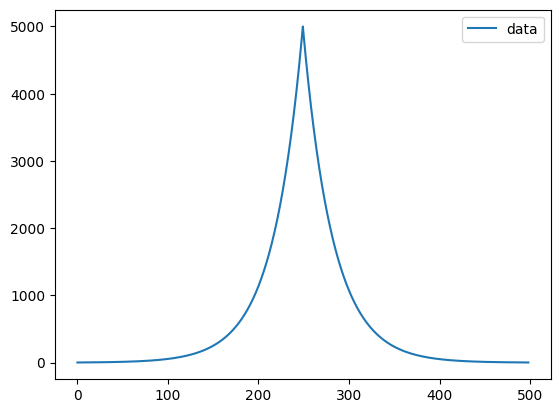

In [37]:
pd.DataFrame(data, columns=["data"]).plot(kind = "line")

<Axes: >

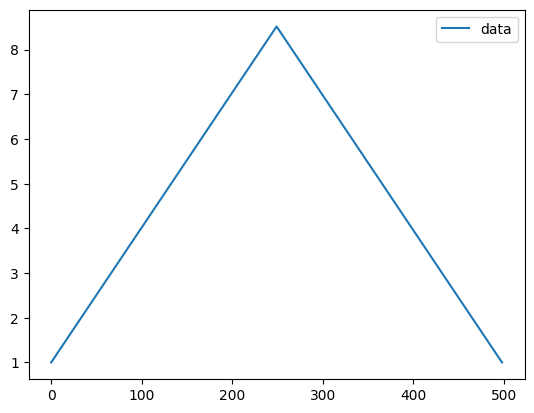

In [38]:
pd.DataFrame(np.log(data), columns=["data"]).plot(kind = "line")

### 4.Power Transformation:

This method applies a power function to the data, to adjust the skewness and kurtosis of the distribution and make the data more symmetric and normally distributed. The formula for power normalization is:

                                   x_norm = sign(x) * abs(x) ** a
where **x** is the original value, **a** is the power parameter (typically between 0 and 1), **sign** is the sign function that returns the sign of **x (+1 or -1)**, and **abs** is the absolute value function. The normalized value **x_norm** is obtained by raising the absolute value of **x** to the power of **a**, and then multiplying it by the sign of **x** to preserve the direction of the data.

<Axes: ylabel='Density'>

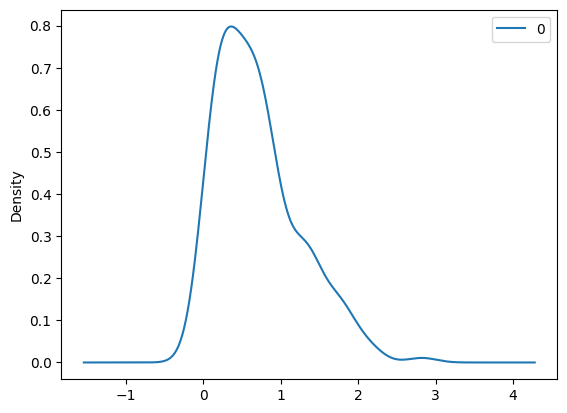

In [39]:
from scipy.stats import skewnorm

data = pd.DataFrame(skewnorm.rvs(25, size = 200))

data.plot.kde()

<Axes: ylabel='Density'>

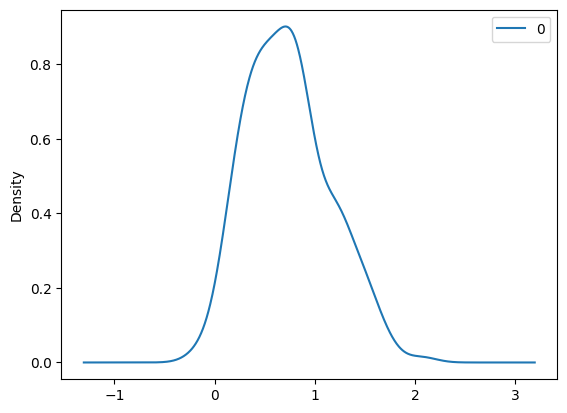

In [40]:
pow_tansformer = lambda series, pow_factor : np.sign(series) * np.power(np.abs(series), pow_factor)
trans_data = pow_tansformer(data, 0.7)
trans_data.plot.kde()